### Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
train = pd.read_csv('train.csv')

In [42]:
train.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [43]:
train.category.unique()

array(['Online and Social Media Related Crime', 'Online Financial Fraud',
       'Online Gambling  Betting',
       'RapeGang Rape RGRSexually Abusive Content',
       'Any Other Cyber Crime', 'Cyber Attack/ Dependent Crimes',
       'Cryptocurrency Crime', 'Sexually Explicit Act',
       'Sexually Obscene material',
       'Hacking  Damage to computercomputer system etc',
       'Cyber Terrorism',
       'Child Pornography CPChild Sexual Abuse Material CSAM',
       'Online Cyber Trafficking', 'Ransomware',
       'Report Unlawful Content'], dtype=object)

In [44]:
train.sub_category.unique()

array(['Cyber Bullying  Stalking  Sexting', 'Fraud CallVishing',
       'Online Gambling  Betting', 'Online Job Fraud',
       'UPI Related Frauds', 'Internet Banking Related Fraud', nan,
       'Other', 'Profile Hacking Identity Theft',
       'DebitCredit Card FraudSim Swap Fraud', 'EWallet Related Fraud',
       'Data Breach/Theft', 'Cheating by Impersonation',
       'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
       'FakeImpersonating Profile', 'Cryptocurrency Fraud',
       'Malware Attack', 'Business Email CompromiseEmail Takeover',
       'Email Hacking', 'Hacking/Defacement',
       'Unauthorised AccessData Breach', 'SQL Injection',
       'Provocative Speech for unlawful acts', 'Ransomware Attack',
       'Cyber Terrorism', 'Tampering with computer source documents',
       'DematDepository Fraud', 'Online Trafficking',
       'Online Matrimonial Fraud', 'Website DefacementHacking',
       'Damage to computer computer systems etc', 'Impersonating E

In [45]:
unique_categories = train[['category', 'sub_category']].drop_duplicates()
unique_categories

,category,sub_category
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting
1,Online Financial Fraud,Fraud CallVishing
2,Online Gambling Betting,Online Gambling Betting
3,Online and Social Media Related Crime,Online Job Fraud
5,Online Financial Fraud,UPI Related Frauds
7,Online Financial Fraud,Internet Banking Related Fraud
8,RapeGang Rape RGRSexually Abusive Content,NaN
9,Any Other Cyber Crime,Other
12,Online and Social Media Related Crime,Profile Hacking Identity Theft
13,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud


In [46]:
unique_categories.count()

category        40
sub_category    36
dtype: int64

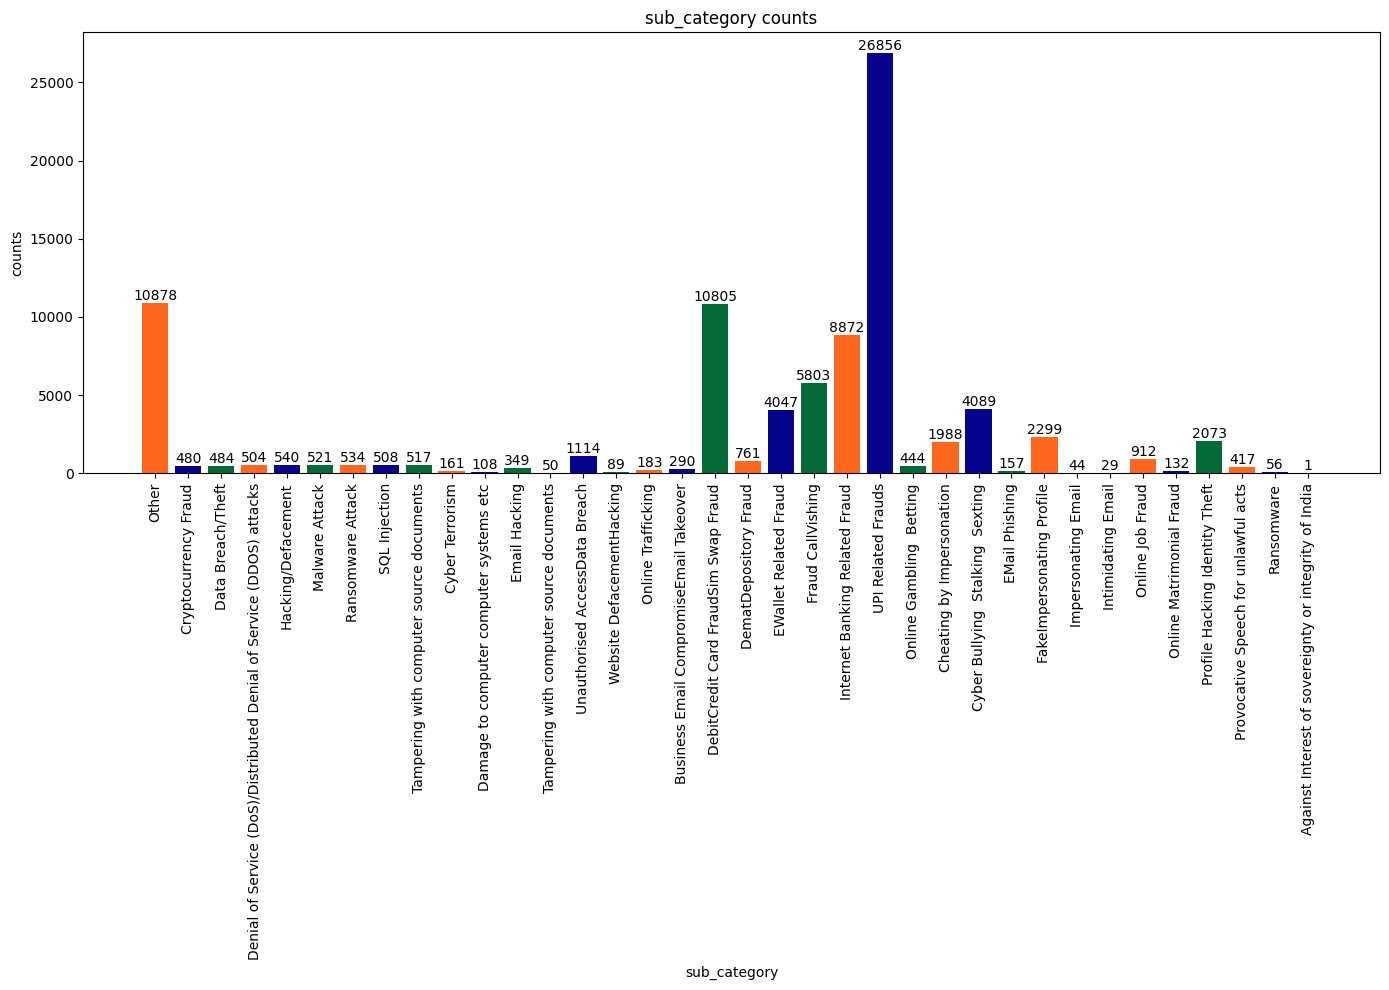

In [47]:
category_counts = train.groupby(['category', 'sub_category']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(14, 10))

bars = ax.bar(
    x=range(len(category_counts)), 
    height=category_counts['counts'], 
    color=[(1,0.403921569,0.121568627), (0.023529412,0.011764706,0.552941176), (0.015686275,0.415686275,0.219607843)]
)

for bar, count in zip(bars, category_counts['counts']):
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        int(count), 
        ha='center', 
        va='bottom'
    )

ax.set_title('sub_category counts')
ax.set_xlabel('sub_category')
ax.set_ylabel('counts')
ax.set_xticks(range(len(category_counts)))
ax.set_xticklabels(category_counts['sub_category'], rotation=90)

plt.tight_layout()

plt.show()

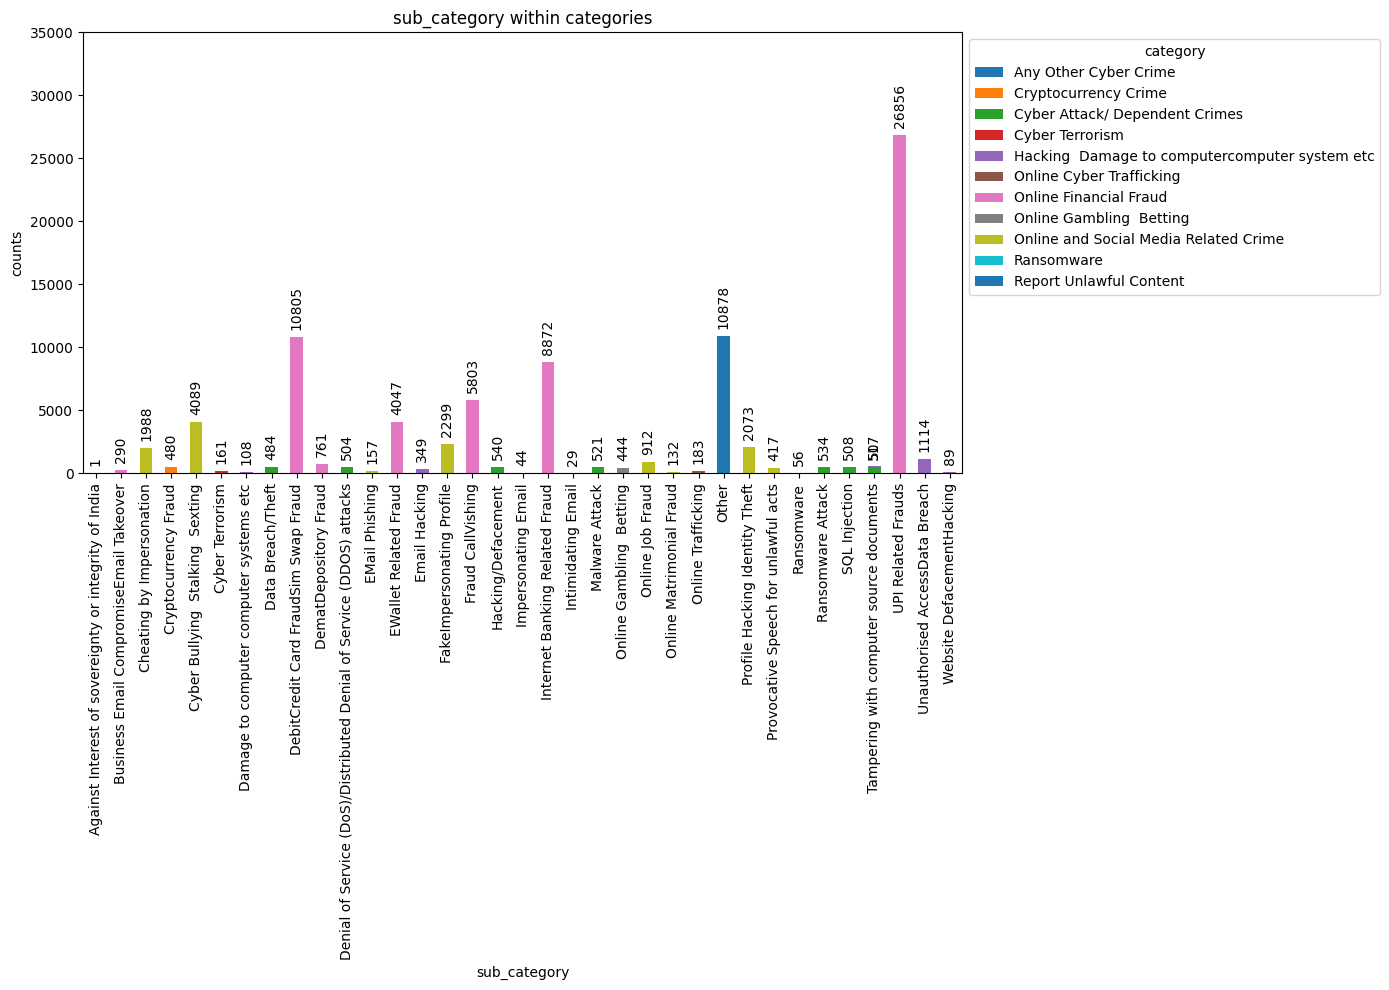

In [48]:
category_counts = train.groupby(['category', 'sub_category']).size().reset_index(name='counts')

pivot_table = category_counts.pivot(index='sub_category', columns='category', values='counts').fillna(0)

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('sub_category within categories')
plt.xlabel('sub_category')
plt.ylabel('counts')
plt.legend(title='category', bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=90)
plt.ylim(0, 35000)

for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', rotation=90, padding=5)

plt.tight_layout()
plt.show()

In [49]:
for i in range(10):
    print(f"{i+1}. {train.category[i]} -> {train.sub_category[i]}: {train.crimeaditionalinfo[i]}\n\n")

1. Online and Social Media Related Crime -> Cyber Bullying  Stalking  Sexting: I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with  Only Girls  and still getting calls from unknown numbers pls help me and sort out the issue  as soon as possible Thank you


2. Online Financial Fraud -> Fraud CallVishing: The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake  cropped nude photos of me to my other contacts through WhatsApp

I am unaware how he has recieved my contacts list from my phone

Please help


3. Online Gambling  Betting -> Online Gambling  Betting: He is acting like a police and demanding for money by adding sections in the text messages 
I request you to take an immediate action on him Frequently he is harassing with these messages For reference please find attached files


4. Online and Social Media Related Crime -> Online Job Fraud: In apna Job I ha

### Preprocess with NLTK

In [50]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB


From `info` it is clear that there are some missing `sub_category`

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [54]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
stop_words = set(stopwords.words('english'))
lemma = nltk.wordnet.WordNetLemmatizer()

In [56]:
def preprocess_text(text):
    # Here everything is lowercased, anything other than alphanumeric character is removed, 
    # then tokenized and lemmatized after removing stopwords 
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemma.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)
    
    return processed_text

In [57]:
train_df['crimeaditionalinfo'] = train_df['crimeaditionalinfo'].apply(preprocess_text)
test_df['crimeaditionalinfo'] = test_df['crimeaditionalinfo'].apply(preprocess_text)

KeyboardInterrupt: 

In [ ]:
train_df.isna().any()

category              False
sub_category           True
crimeaditionalinfo    False
dtype: bool

In [ ]:
test_df.isna().any()

category              False
sub_category           True
crimeaditionalinfo    False
dtype: bool

In [ ]:
# Removing the sub_category column
train_df = train_df.drop('sub_category', axis=1)
test_df = test_df.drop('sub_category', axis=1)

In [ ]:
train_df.isna().any()

category              False
crimeaditionalinfo    False
dtype: bool

In [ ]:
test_df.isna().any()

category              False
crimeaditionalinfo    False
dtype: bool

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   crimeaditionalinfo  93686 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   crimeaditionalinfo  31229 non-null  object
dtypes: object(2)
memory usage: 488.1+ KB


In [ ]:
# Removing entries with blank descriptions, other than NANs
train_df = train_df.replace(r'^\s*$', np.nan, regex=True)
train_df['crimeaditionalinfo'] = train_df['crimeaditionalinfo'].replace('nan', np.nan)
train_df = train_df.dropna()

test_df = test_df.replace(r'^\s*$', np.nan, regex=True)
test_df['crimeaditionalinfo'] = test_df['crimeaditionalinfo'].replace('nan', np.nan)
test_df = test_df.dropna()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92441 entries, 0 to 93685
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            92441 non-null  object
 1   crimeaditionalinfo  92441 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30836 entries, 0 to 31228
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            30836 non-null  object
 1   crimeaditionalinfo  30836 non-null  object
dtypes: object(2)
memory usage: 722.7+ KB


In [ ]:
test = test_df['crimeaditionalinfo'].unique().tolist()

In [ ]:
test[4030]

'fraud upi fraud bank indusind bank account number total amount please hold reverse total amount complaint account take necessary action'

### Creating integer labels for classification

In [ ]:
train_df.category.value_counts()

category
Online Financial Fraud                                  56705
Online and Social Media Related Crime                   11872
Any Other Cyber Crime                                   10725
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2816
Sexually Obscene material                                1818
Hacking  Damage to computercomputer system etc           1681
Sexually Explicit Act                                    1530
Cryptocurrency Crime                                      477
Online Gambling  Betting                                  438
Child Pornography CPChild Sexual Abuse Material CSAM      374
Online Cyber Trafficking                                  180
Cyber Terrorism                                           160
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [ ]:
test_df.category.value_counts()

category
Online Financial Fraud                                  18658
Online and Social Media Related Crime                    4065
Any Other Cyber Crime                                    3622
Cyber Attack/ Dependent Crimes                           1261
RapeGang Rape RGRSexually Abusive Content                 911
Sexually Obscene material                                 658
Hacking  Damage to computercomputer system etc            580
Sexually Explicit Act                                     528
Cryptocurrency Crime                                      165
Online Gambling  Betting                                  133
Child Pornography CPChild Sexual Abuse Material CSAM      121
Online Cyber Trafficking                                   61
Cyber Terrorism                                            51
Ransomware                                                 18
Crime Against Women & Children                              4
Name: count, dtype: int64

In [ ]:
labels = train_df['category'].unique().tolist() + test_df['category'].unique().tolist()
labels = list(set(labels))
labels = [label.strip() for label in labels]
labels

['RapeGang Rape RGRSexually Abusive Content',
 'Hacking  Damage to computercomputer system etc',
 'Report Unlawful Content',
 'Online Financial Fraud',
 'Cyber Terrorism',
 'Online Gambling  Betting',
 'Crime Against Women & Children',
 'Ransomware',
 'Online Cyber Trafficking',
 'Sexually Explicit Act',
 'Child Pornography CPChild Sexual Abuse Material CSAM',
 'Sexually Obscene material',
 'Any Other Cyber Crime',
 'Cyber Attack/ Dependent Crimes',
 'Cryptocurrency Crime',
 'Online and Social Media Related Crime']

In [ ]:
test_df['category'].unique().tolist()

['RapeGang Rape RGRSexually Abusive Content',
 'Online Financial Fraud',
 'Cyber Attack/ Dependent Crimes',
 'Any Other Cyber Crime',
 'Hacking  Damage to computercomputer system etc',
 'Sexually Explicit Act',
 'Sexually Obscene material',
 'Online and Social Media Related Crime',
 'Child Pornography CPChild Sexual Abuse Material CSAM',
 'Cryptocurrency Crime',
 'Online Gambling  Betting',
 'Online Cyber Trafficking',
 'Cyber Terrorism',
 'Ransomware',
 'Crime Against Women & Children']

In [ ]:
LABEL_COUNTS = len(labels)
id_label = {id:label for id, label in enumerate(labels)}
label_id = {label:id for id, label in enumerate(labels)}

In [ ]:
id_label

{0: 'RapeGang Rape RGRSexually Abusive Content',
 1: 'Hacking  Damage to computercomputer system etc',
 2: 'Report Unlawful Content',
 3: 'Online Financial Fraud',
 4: 'Cyber Terrorism',
 5: 'Online Gambling  Betting',
 6: 'Crime Against Women & Children',
 7: 'Ransomware',
 8: 'Online Cyber Trafficking',
 9: 'Sexually Explicit Act',
 10: 'Child Pornography CPChild Sexual Abuse Material CSAM',
 11: 'Sexually Obscene material',
 12: 'Any Other Cyber Crime',
 13: 'Cyber Attack/ Dependent Crimes',
 14: 'Cryptocurrency Crime',
 15: 'Online and Social Media Related Crime'}

In [ ]:
label_id

{'RapeGang Rape RGRSexually Abusive Content': 0,
 'Hacking  Damage to computercomputer system etc': 1,
 'Report Unlawful Content': 2,
 'Online Financial Fraud': 3,
 'Cyber Terrorism': 4,
 'Online Gambling  Betting': 5,
 'Crime Against Women & Children': 6,
 'Ransomware': 7,
 'Online Cyber Trafficking': 8,
 'Sexually Explicit Act': 9,
 'Child Pornography CPChild Sexual Abuse Material CSAM': 10,
 'Sexually Obscene material': 11,
 'Any Other Cyber Crime': 12,
 'Cyber Attack/ Dependent Crimes': 13,
 'Cryptocurrency Crime': 14,
 'Online and Social Media Related Crime': 15}

In [ ]:
train_df["labels"] = train_df.category.map(lambda x: label_id[x.strip()])
test_df["labels"] = test_df.category.map(lambda x: label_id[x.strip()])

In [ ]:
# Save the processed files
train_df.to_csv('train_processed.csv', index=False)
test_df.to_csv('test_processed.csv', index=False)